### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association



In [2]:
df = pd.read_csv("C:/Users/olivi/Documents/Ironhack/Week 5/amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
cross_table = pd.crosstab(df["category"], df["isBestSeller"])
cross_table

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [5]:
cross_table["bestseller_ratio"] = round((cross_table[True] / cross_table[False])*100, 2)
cross_table


isBestSeller,False,True,bestseller_ratio
category,,,
3D Printers,247,1,0.40
3D Printing & Scanning,4065,2,0.05
Abrasive & Finishing Products,245,5,2.04
Action Cameras,1696,1,0.06
Adapters,251,3,1.20
...,...,...,...
Wind Instruments,243,7,2.88
Window Treatments,234,5,2.14
Women,17559,213,1.21


In [6]:
cross_table.sort_values(by="bestseller_ratio", ascending=False)

# Grocery category is the one with the highest bestseller ratio, followed by Health & Personal Care, and Smart Home Security & Lighting

isBestSeller,False,True,bestseller_ratio
category,,,
Grocery,9008,556,6.17
Health & Personal Care,9017,552,6.12
Smart Home Security & Lighting,98,6,6.12
Mobile Phone Accessories,248,11,4.44
Power & Hand Tools,8353,306,3.66
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.00
Snowboard Boots,1449,0,0.00
General Music-Making Accessories,259,0,0.00


In [7]:
# ChiSquare test
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cross_table)

chi2_statistic, chi2_p_value

# The p-value of the chi2_statistic shows a strong association between category and isBestetSeller

(51286.99174092549, 0.0)

In [8]:
# Cramers' V

# Remove the 'bestseller_ratio' column to ensure only integer values are passed
cross_table_int = cross_table.drop(columns=["bestseller_ratio"])

# Computing the association between variables in 'cross_table_int' using the "cramer" method
association(cross_table_int, method="cramer")

# The association between variables in 'cross_table_int' is 0.12, which is a low association bewteen category and isBestetSeller


0.1222829439760564

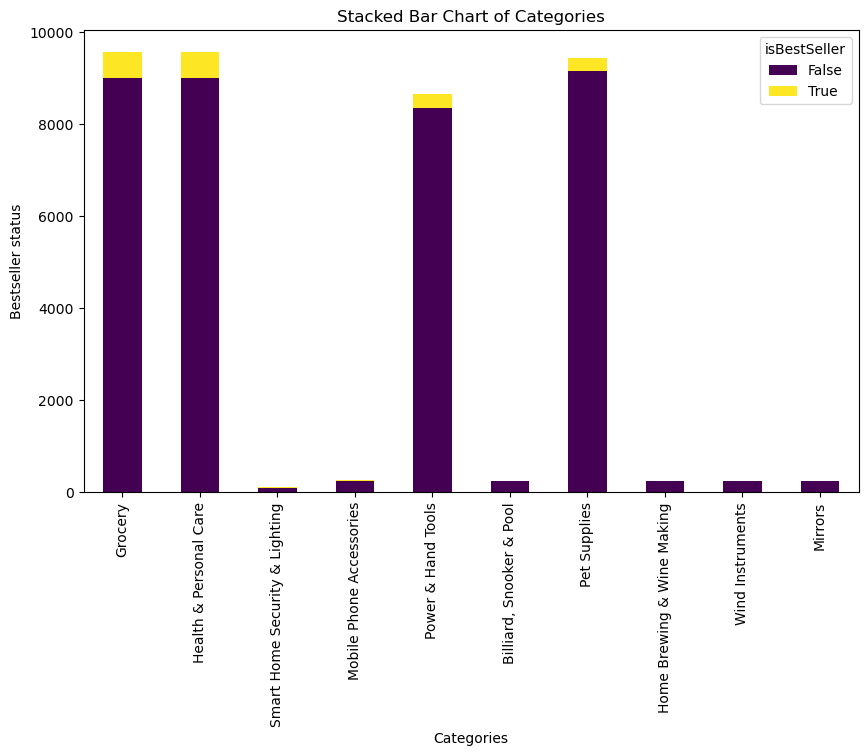

In [9]:
top_ten_bestseller = cross_table.sort_values(by="bestseller_ratio", ascending=False).head(10)

top_ten_bestseller.drop(columns=["bestseller_ratio"], inplace=True)

# Plotting the stacked bar chart
top_ten_bestseller.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Adding title and labels
plt.title('Stacked Bar Chart of Categories')
plt.xlabel('Categories')
plt.ylabel('Bestseller status')
plt.legend(title='isBestSeller')
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [27]:
"""def tukeys_test_outliers(df, method = "delete"):
    df_outliers = df.copy()
    
    Q1 = df_outliers.quantile(0.25)
    Q3 = df_outliers.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = df_outliers[(df_outliers < lower_bound) | (df_outliers > upper_bound)]
    
    if method == "show":
        return outliers
    
    elif method == "replace":
        median = df_outliers.median()
        df_outliers.loc[outliers.index] = median
        return df_outliers
    elif method == "delete":
        index_drop = outliers.index
        data_no_outliers = df_outliers.drop(index_drop)

        return data_no_outliers"""

'def tukeys_test_outliers(df, method = "delete"):\n    df_outliers = df.copy()\n    \n    Q1 = df_outliers.quantile(0.25)\n    Q3 = df_outliers.quantile(0.75)\n    IQR = Q3 - Q1\n    \n    # Define bounds for the outliers\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    # Identify the outliers\n    outliers = df_outliers[(df_outliers < lower_bound) | (df_outliers > upper_bound)]\n    \n    if method == "show":\n        return outliers\n    \n    elif method == "replace":\n        median = df_outliers.median()\n        df_outliers.loc[outliers.index] = median\n        return df_outliers\n    elif method == "delete":\n        index_drop = outliers.index\n        data_no_outliers = df_outliers.drop(index_drop)\n\n        return data_no_outliers'

In [30]:
df_outliers = df.copy()
    
Q1 = df_outliers.price.quantile(0.25)
Q3 = df_outliers.price.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df_outliers[(df_outliers['price'] < lower_bound) | (df_outliers['price'] > upper_bound)]
    
index_drop = outliers.index
data_no_outliers = df_outliers.drop(index_drop)
data_no_outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [31]:
data_no_outliers.to_csv("outliers_removed.csv")

In [37]:
data_no_outliers.price.value_counts()

price
9.99     48922
12.99    38823
8.99     34058
7.99     33632
14.99    32570
         ...  
99.93        2
0.03         2
0.06         2
97.71        1
0.53         1
Name: count, Length: 10000, dtype: int64

In [32]:
# Count categories
category_counts = data_no_outliers.category.value_counts()
category_counts

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
                                           ...  
Home Entertainment                            57
Smart Speakers                                49
Alexa Built-In Devices                        39
3D Printers                                   36
Motorbike Exhaust & Exhaust Systems           28
Name: count, Length: 296, dtype: int64

In [33]:
top_20_categories = category_counts.nlargest(20).reset_index()
top_20_categories


,category,count
0,Sports & Outdoors,694092
1,Beauty,19233
2,Bath & Body,19050
3,Manicure & Pedicure Products,18904
4,"Handmade Clothing, Shoes & Accessories",18811
5,Make-up,18718
6,Skin Care,18686
7,Hair Care,18625
8,Birthday Gifts,18398
9,Handmade Gifts,17948


In [42]:
top_20_df = data_no_outliers[data_no_outliers['category'].isin(top_20_categories["category"])]

In [43]:

top_20_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


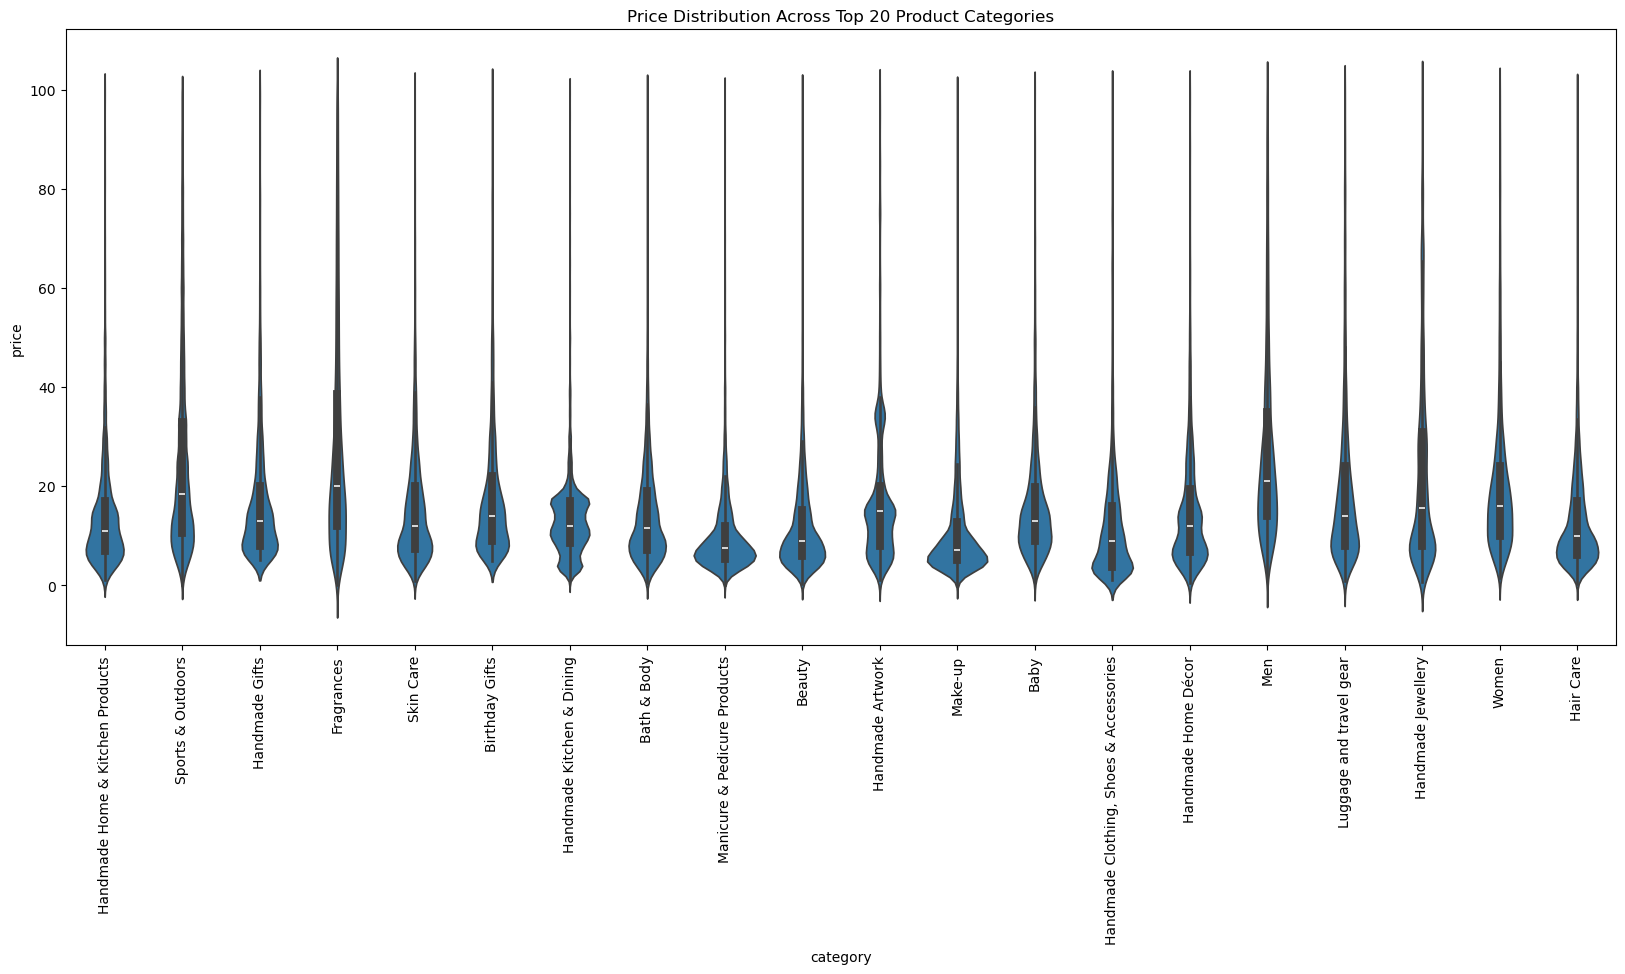

In [44]:
# Create a violin plot of price distribution for these top categories
plt.figure(figsize=(20, 8))
sns.violinplot(x='category', y='price', data=top_20_df)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Top 20 Product Categories')
plt.show()

In [45]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

top_10_categories = category_counts.nlargest(10).reset_index()
top_10_categories

,category,count
0,Sports & Outdoors,694092
1,Beauty,19233
2,Bath & Body,19050
3,Manicure & Pedicure Products,18904
4,"Handmade Clothing, Shoes & Accessories",18811
5,Make-up,18718
6,Skin Care,18686
7,Hair Care,18625
8,Birthday Gifts,18398
9,Handmade Gifts,17948


In [48]:
top_10_df = data_no_outliers[data_no_outliers['category'].isin(top_10_categories["category"])]

In [58]:
top_10_df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors


In [49]:
top_10_df.price.mean()

22.987273164708142

In [50]:
average_prices = top_10_df.groupby('category')['price'].mean().sort_values(ascending=False)
average_prices


category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

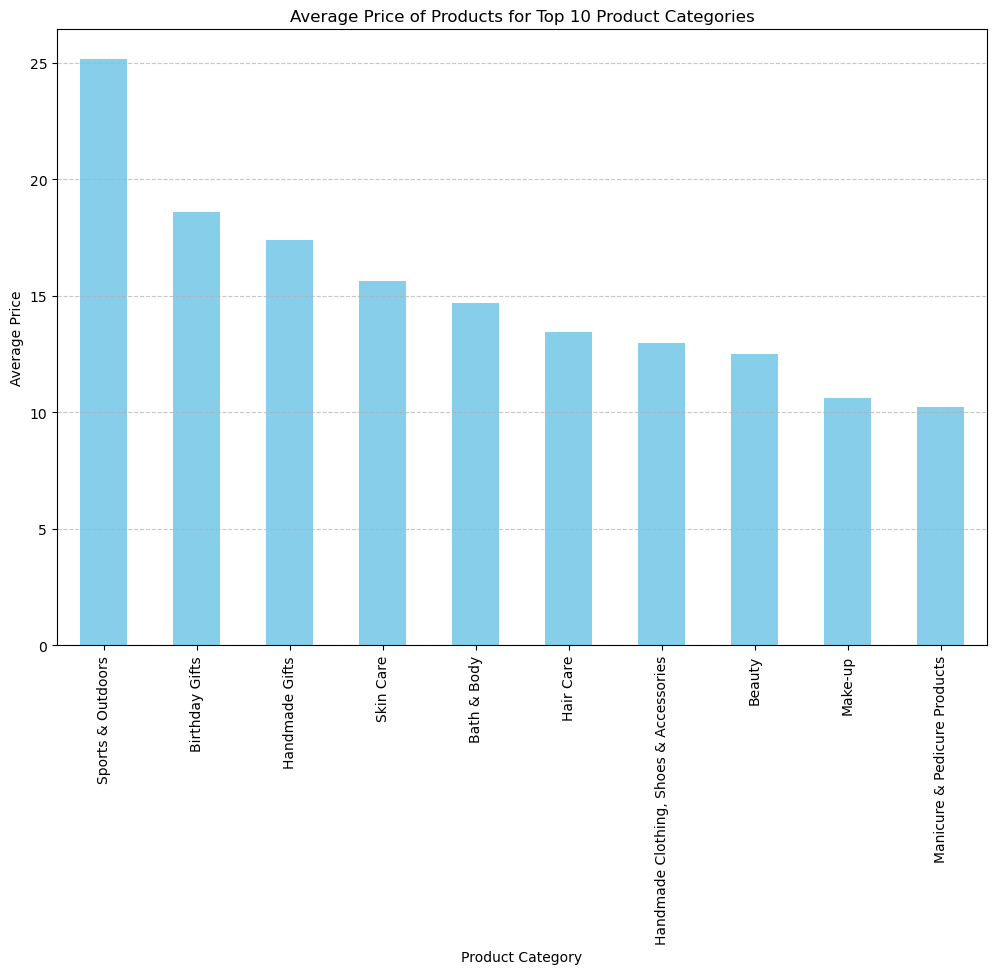

In [53]:
plt.figure(figsize=(12, 8))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
highest_avg_price_category = average_prices.idxmax()
print(f"The product category with the highest average price is: {highest_avg_price_category}")

The product category with the highest average price is: Sports & Outdoors


**Box Plots**:
Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

C:\Users\olivi\AppData\Local\Temp\ipykernel_19340\1025993889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=top_10_df, palette='Set3')


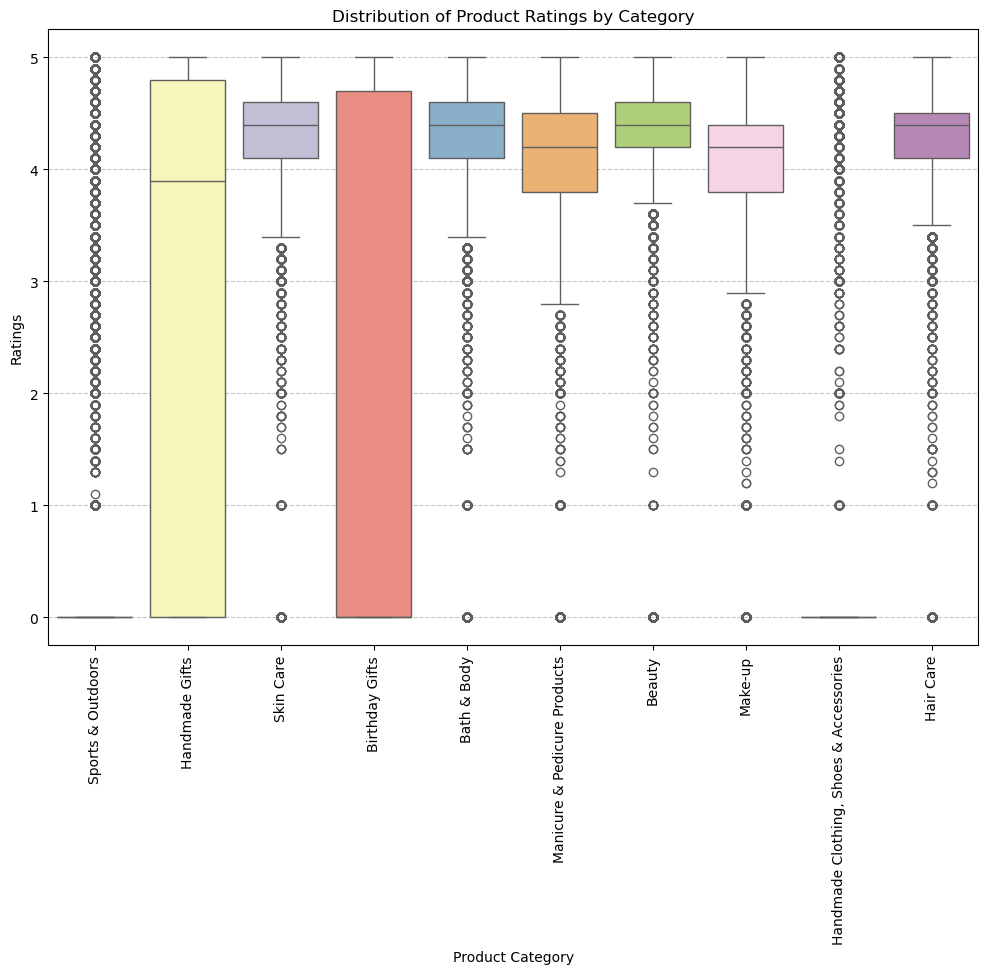

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=top_10_df, palette='Set3')
plt.title('Distribution of Product Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [63]:
median_stars = data_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
median_stars
# Computer & memory seems to have the highest median rating of all categories

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [68]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns
correlation = data_no_outliers['price'].corr(data_no_outliers['stars'])
correlation

-0.07767299878178476

In [67]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea' 
correlation = data_no_outliers['price'].corr(data_no_outliers['stars'], method='spearman')
correlation

-0.06679697280756669

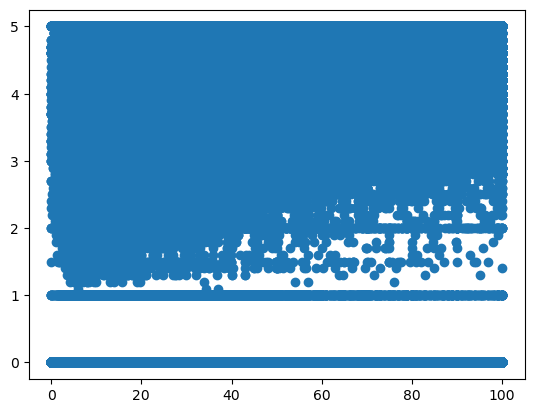

In [69]:
plt.scatter(data_no_outliers['price'], data_no_outliers['stars'])
plt.show()

In [ ]:
# There seems to be no linear or monotonic correlation between price and stars

In [70]:
df_numerical = data_no_outliers.select_dtypes(include=np.number)

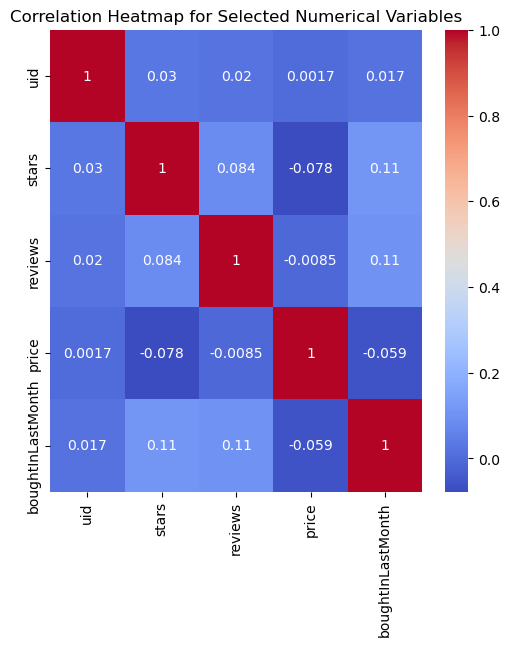

In [72]:
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(6, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

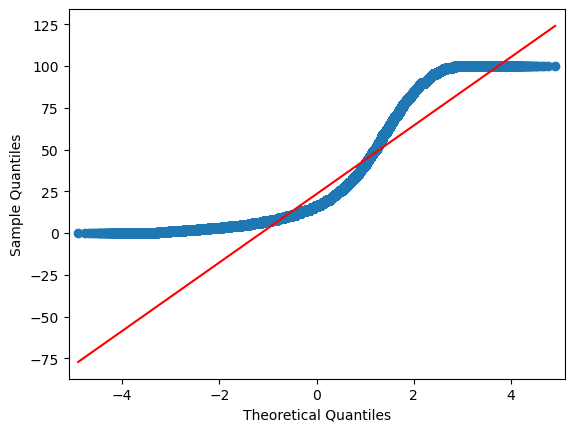

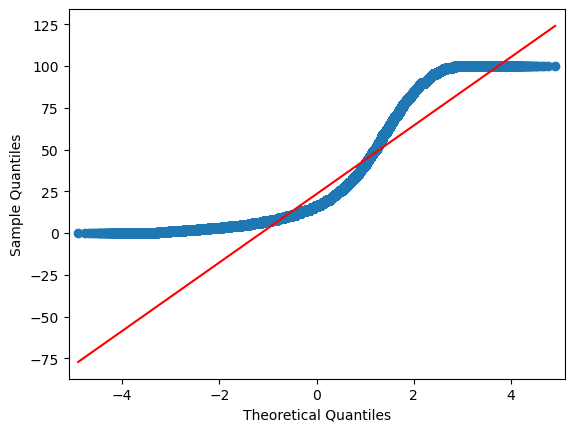

In [74]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(data_no_outliers['price'], line='s')

In [75]:
# the QQ plot indicates that the price data does not follow a normal distribution. It may have heavy tails, skewness, and possibly some outliers